<a href="https://colab.research.google.com/github/Homedepot5/DataScience/blob/deeplearning/exercise_fashion_mnist_gpu_benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

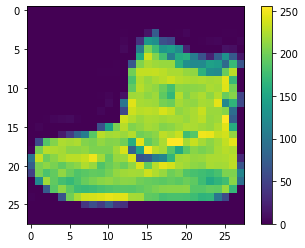

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Excercise material

In [29]:
def get_model(hidden_layers=1):
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # Your code goes here-----------START
    # Create Flatten input layers
    for i in range(hidden_layers):
    # Create hidden layers that are equal to hidden_layers argument in this function
         layers.append(keras.layers.Dense(128, activation='relu'),)
    # Create output
         layers.append(keras.layers.Dense(10))
    # Your code goes here-----------END
    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [31]:
model = get_model(1)
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3850 - accuracy: 0.1433
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1307
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1307
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1307
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1307


In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3784 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3387 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3145 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2601 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3341 - accuracy: 0.8797

Test accuracy: 0.8797000050544739


In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)

In [16]:
predictions[0]

array([6.8415713e-09, 2.1278257e-12, 1.7077648e-08, 1.4692348e-11,
       4.9067011e-11, 1.1962797e-03, 1.1652671e-07, 1.0062360e-02,
       6.1105663e-07, 9.8874062e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

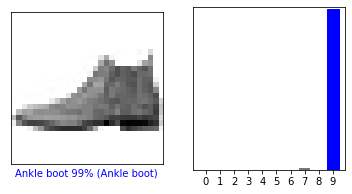

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

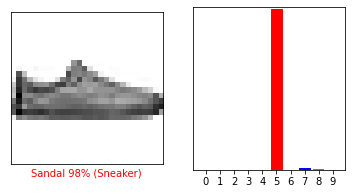

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

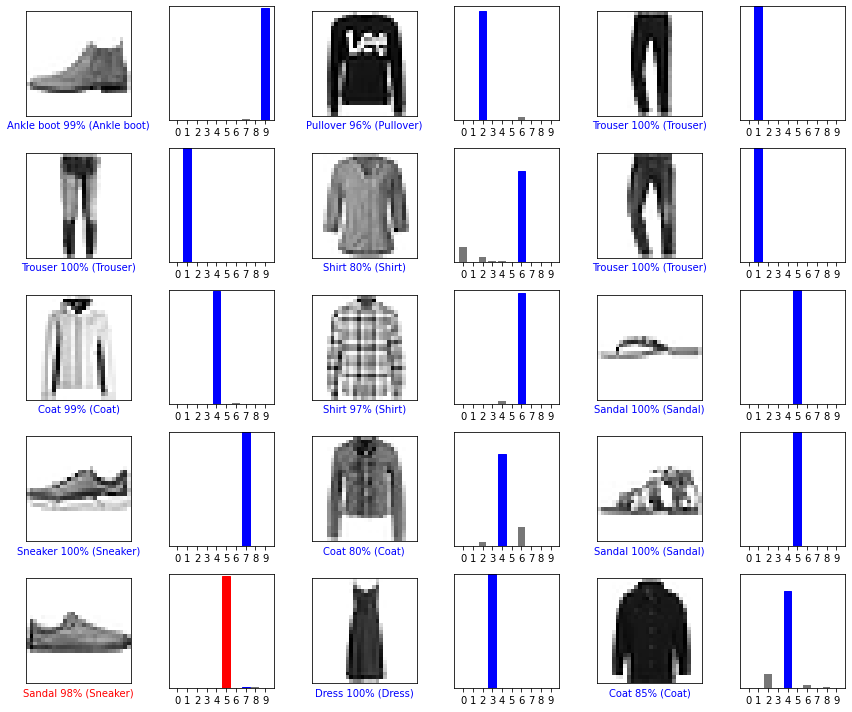

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()